In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [10]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

# 8:2 확률로 특성(features)과 정답(labels)을 분리
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2, # test_size= : 분리 기준 설정
                                                    # train : 80%, test : 20% 로 데이터 분리
                                                    stratify=labels,
                                                    # stratify= : 나눈 데이터에 labels 수를 동일한 비율로 맞춰주는 설정
                                                    random_state=13)

# random_state : scikit learn에서 사용하는 random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용
# train_test_split(..., test_size=0.2) 과 같은 함수는 80% train, 20% test 데이터 세트를 추출합니다. 
# 하지만 random_state 미설정 시 추출된 데이터는 수행을 할때마다 다르게, random하게 80%, 20%를 추출하기 때문입니다.
# 이를 random_state를 통하여 80%, 20% 추출 시 동일한 데이터를 추출하기 위해 설정하는 메써드
# random_state 뒤의 숫자는 특별한 의미를 가지는 것은 아니며 지정한 숫자별로 동일한 데이터를 추출하는 기준 값으로 인식

In [11]:
y_train.shape, y_test.shape

((120,), (30,))

In [12]:
import numpy as np

# 위에서 120, 30 개로 나눈 데이터에 3가지 속성의 값들이 동일한 비율로 들어가있는지 확인, 비율이 동일한 것이 좋은 데이터
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [13]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
                                    # max_depth= : decision tree의 반복할 조건 수 지정, DecisionTree의 가지 갯수
                                    # 높게 지정할 수록 정확도는 100%에 가까워 진다
                                    # 정확도가 높은 것은 좋으나 이 또한 과적합을 발생 할 수 있기 때문에
                                    # 규제하여(max_depth를 낮게 주어=모델을 단순화하여) 모델에 제공한 
                                    # 트레이닝 데이터에 최적화되지 않도록 모델의 성능을 제한시켜야 한다
iris_tree.fit(X_train, y_train)
# 이번엔 fit에 상기에서 분리한 데이터 입력


DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.201\nsamples = 44\nvalue = [0, 5, 39]')]

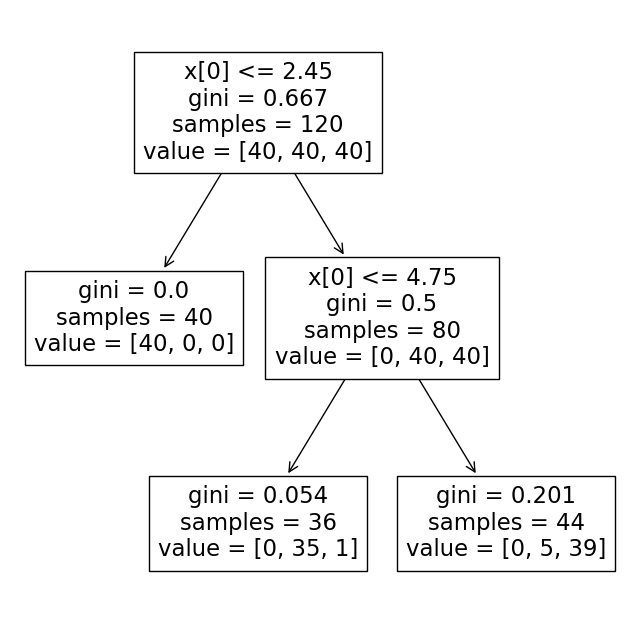

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 8))
plot_tree(iris_tree)

In [16]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr)


0.9533333333333334

<function matplotlib.pyplot.show(close=None, block=None)>

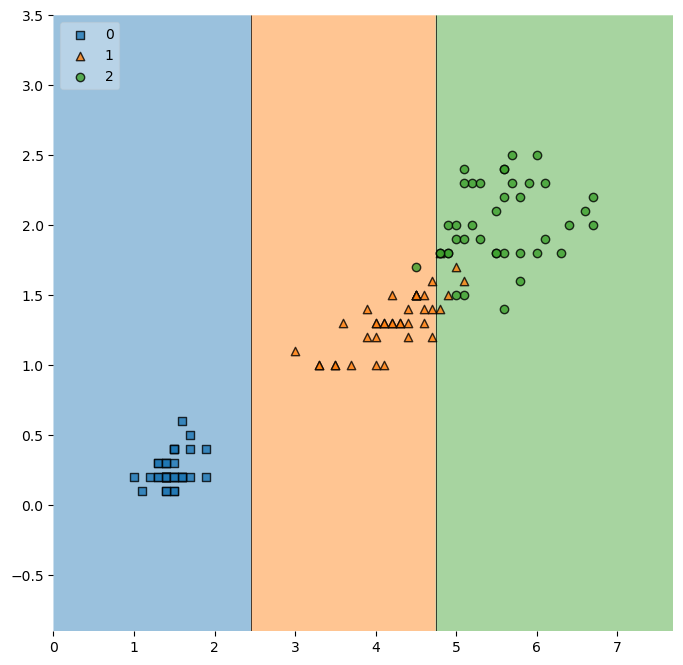

In [17]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
                                                         # clf : classifier(=분류기), 여기선 iris를 구분하기 위해 학습한 iris_tree   
plt.show

In [18]:
y_pred_test = iris_tree.predict(X_test)
# .predict : 데이터를 줄테니 .fit을 통해 학습한데로 예측을 해봐라
accuracy_score(y_test, y_pred_test)
# accuracy_score(정답데이터, 예측데이터) : 정답데이터와 예측데이터를 비교하여 정확도를 계산해달라는 명령어 

0.9666666666666667

In [28]:
features = iris.data
labels = iris.target

# 8:2 확률로 특성(features)과 정답(labels)을 분리
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2, # test_size= : 분리 기준 설정
                                                    # train : 80%, test : 20% 로 데이터 분리
                                                    stratify=labels,
                                                    # stratify= : 나눈 데이터에 속성 값들을 동일한 비율로 맞춰주는 설정
                                                    random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.201\nsamples = 44\nvalue = [0, 5, 39]')]

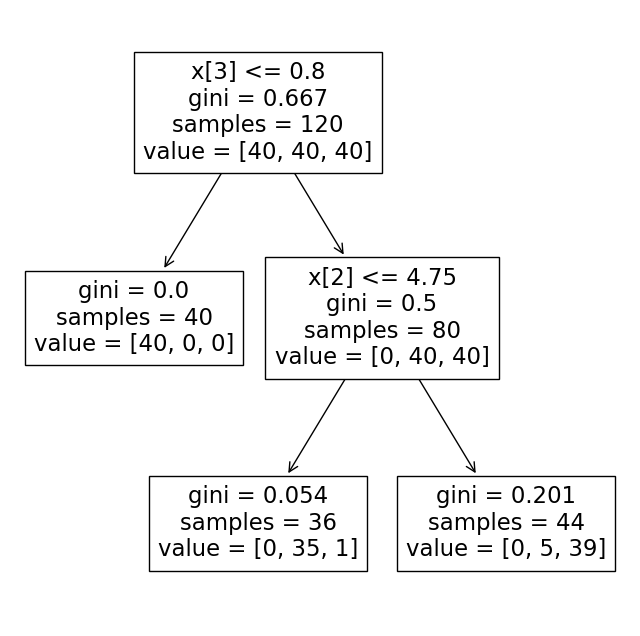

In [29]:
plt.figure(figsize=(8, 8))
plot_tree(iris_tree)

In [30]:
test_data = np.array([[4.3, 2.0, 1.2, 1.0]])
iris_tree.predict(test_data)

array([1])

In [32]:
iris_tree.predict_proba(test_data)
# predict_proba() : 예측된 값이 3가지 속성들 중 얼마나 비중을 차지하는지 보여주는 함수

array([[0.        , 0.97222222, 0.02777778]])

In [33]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [35]:
iris_tree.feature_importances_
# .feature_importances_ : max_depth= 설정 시 모델을 결정하기 위한 중요 feature가 어떻게 나왔는지 각각의 중요도를 보여주는 메써드
# max_depth= 를 높게 설정하게 되면 모델이 복잡해지면서 여러가지 feature를 더 많이 고려한 것을 보여준다

array([0.        , 0.        , 0.42189781, 0.57810219])

In [37]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}

##### zip : 리스트를 순서대로 묶어서 튜플 형태로 변환

In [40]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

In [41]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [43]:
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [44]:
dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

##### unpacking ' * ' 을 통한 역변환

In [45]:
x, y = zip(*pairs)

In [46]:
x

('a', 'b', 'c')

In [48]:
list(x)

['a', 'b', 'c']

In [49]:
y

(1, 2, 3)

In [50]:
list(y)

[1, 2, 3]